
Bảng ma trận 50x60 user & slot:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 1 | 1 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 1 | 0 | 1 | 1 | 1 | 0 | 0 | 1 | 1 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 1 | 0 | 1 | 0 | 0 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 1 |

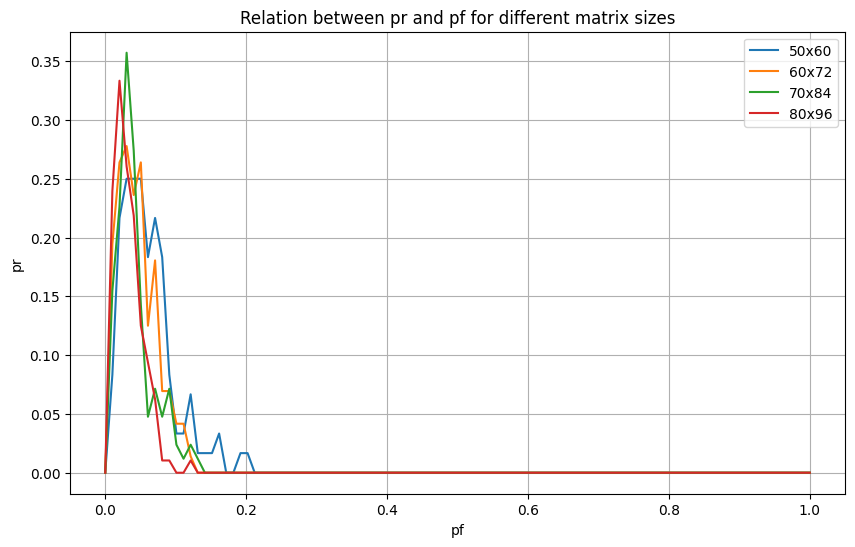

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

def binomial_coefficient(n, k):
    return math.comb(n, k)

def Pr(i, N, pr):
    binomial_coefficient_value = binomial_coefficient(N, i)
    term1 = (1 - pr) ** (N - i)
    term2 = pr ** i
    probability = binomial_coefficient_value * term1 * term2
    return probability

def Pf(i, N, M, pf):
    binomial_coefficient_value = binomial_coefficient(M - N, i)
    term1 = (1 - pf) ** (M - N - i)
    term2 = pf ** i
    probability = binomial_coefficient_value * term1 * term2
    return probability

def calculate_pr(matrix):
    total_slots = matrix.shape[1]
    slots_with_2_ones = np.sum(np.sum(matrix, axis=0) == 2)
    pr = slots_with_2_ones / total_slots
    return pr

# Hàm tính giá trị pr cho một ma trận kích thước (m, n)
def calculate_pr_for_matrix(m, n, pf):
    matrix = np.random.choice([0, 1], size=(m, n), p=[1 - pf, pf])
    return calculate_pr(matrix)

def Pts(N, M, pf, pr):
    Pf_1_N = Pf(1, N, M, pf)
    Pr_0_N = Pr(0, N, pr)
    Pf_0_N = Pf(0, N, M, pf)
    Pr_1_N = Pr(1, N, pr)
    probability = Pf_1_N * Pr_0_N + Pf_0_N * Pr_1_N
    return probability

def Pps(N, M, pf, pr):
    Pf_2_N = Pf(2, N, M, pf)
    Pf_1_N = Pf(1, N, M, pf)
    Pr_0_N = Pr(0, N, pr)
    Pf_0_N = Pf(0, N, M, pf)
    Pr_2_N = Pr(2, N, pr)
    Pr_1_N = Pr(1, N, pr)
    probability = Pf_2_N * Pr_0_N + Pf_0_N * Pr_2_N + Pf_1_N * Pr_1_N
    return probability

def calculate_pi_n(matrix, M, pf):
    pi_n = np.zeros(M + 1)

    for N in range(M + 1):
        pi_n[N] = np.sum(matrix[N]/M)

    return pi_n

def calculate_throughput(matrix, M, pf, pr):
    A = matrix.shape[1]  # Số slot
    throughput = 0.0

    for N in range(M + 1):
        pi_n = calculate_pi_n(matrix, M, pf)[N]  # Tính xác suất pi_n cho N gói
        pts = Pts(N, M, pf, pr)
        pps = Pps(N, M, pf, pr)

        throughput += pi_n * (pts + pps)

    return throughput


# Tính xác suất Pr cho mỗi ma trận và mô phỏng đồ thị
pf_values = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 6))

for m in [50, 60, 70, 80]:
    n = int(m*(1+0.2))  # Số slot
    pf = 0.3  # Xác suất pf

    # Tạo ma trận với các giá trị ngẫu nhiên theo xác suất pf
    matrix = np.random.choice([0, 1], size=(m, n), p=[1 - pf, pf])

    # Hiển thị bảng ma trận user & slot trên terminal
    print(f"\nBảng ma trận {m}x{n} user & slot:")
    print("-" * (n * 4 + 1))

    for i in range(m):
        row_str = "|"
        for j in range(n):
            row_str += f" {matrix[i, j]} |"
        print(row_str)
        print("-" * (n * 4 + 1))

    # Tính giá trị pr và làm tròn giá trị đến 5 chữ số sau dấu phẩy
    pr_value = calculate_pr(matrix)
    pr_value_rounded = round(pr_value, 5)
    print(f"Giá trị pr cho ma trận {m}x{n}: {pr_value_rounded}")

    # Mô phỏng đồ thị giữa pr và pf
    pr_values = [calculate_pr_for_matrix(m, n, pf) for pf in pf_values]
    plt.plot(pf_values, pr_values, label=f'{m}x{n}')

plt.xlabel('pf')
plt.ylabel('pr')
plt.title('Relation between pr and pf for different matrix sizes')
plt.legend()
plt.grid(True)

    # Mô phỏng đồ thị giữa pf và throughput
throughput_values = [calculate_throughput(matrix, m, pf, pr_value) for pf in pf_values]
plt.subplot(2, 1, 2)
plt.plot(pf_values, throughput_values, label=f'{m}x{n}')
plt.xlabel('pf')
plt.ylabel('throughput')
plt.title('Relation between pf and throughput for different matrix sizes')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
